<a href="https://colab.research.google.com/github/SuperNZH/KPMG_DataAnalytics_Virtual_Program/blob/main/2_Data_Insights/data_insight_pureDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

**Sprocket Central Pty Ltd** has given us a new list of 1000 potential customers with their demographics and attributes. However, these customers do not have prior transaction history with the organisation. 

Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, recommend which of these 1000 new customers should be targeted to drive the most value for the organisation. 

---

***OBJECTIVE***

*   Data Exploration
*   Model Development
*   Interpretation



***PROCESS*** 

1. Understanding the data distributions
2. Feature engineering
3. Data transformations
4. Modelling
5. Results interpretation and reporting.

PowerPoint presentation includes a detailed approach for our strategy behind each of the 3 phases including activities involved in each - i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off.

# Mount Drive and Read Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Colab_Notebooks/my_project/kpmg_virtual_intern/kpmg.xlsx"

# For Training
transactions = pd.read_excel(path, sheet_name=1, header=1, index_col=0)
customer_demographic = pd.read_excel(path, sheet_name=3, header=1, index_col=0)
customer_address = pd.read_excel(path, sheet_name=4, header=1, index_col=0)

# For Prediction
new_customer_list = pd.read_excel(path, sheet_name=2, header=1, index_col=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  if __name__ == '__main__':


In [102]:
new_customer_list.head()

,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
first_name,,,,,,,,,,,,,,,,,,,,,
Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14.0,...,QLD,Australia,6.0,0.81,1.0125,1.265625,1.075781,1,1.0,1.718750
Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16.0,...,NSW,Australia,11.0,1.06,1.0600,1.325000,1.126250,1,1.0,1.718750
Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10.0,...,VIC,Australia,5.0,0.44,0.4400,0.440000,0.440000,1,1.0,1.718750
Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5.0,...,QLD,Australia,1.0,1.02,1.2750,1.275000,1.275000,4,4.0,1.703125
Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19.0,...,NSW,Australia,9.0,0.79,0.7900,0.987500,0.987500,4,4.0,1.703125


# EDA

The above steps are intended to get a rough and quick overview of the new data set

We should **Join** 3 different tables at first so that can be easier to compare with newCustomerList

In [ ]:
print(transactions.columns)
print(customer_demographic.columns)
print(customer_address.columns)

Index(['product_id', 'customer_id', 'transaction_date', 'online_order',
       'order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')
Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')
Index(['address', 'postcode', 'state', 'country', 'property_valuation'], dtype='object')


## Customer Demographic

In [ ]:
customer_demographic.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
customer_id,,,,,,,,,,,,
1.0,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
2.0,Eli,Bockman,Male,81.0,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
3.0,Arlin,Dearle,Male,61.0,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
4.0,Talbot,NaN,Male,33.0,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
5.0,Sheila-kathryn,Calton,Female,56.0,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [ ]:
customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4000 entries, 1.0 to 4000.0
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           4000 non-null   object        
 1   last_name                            3875 non-null   object        
 2   gender                               4000 non-null   object        
 3   past_3_years_bike_related_purchases  4000 non-null   float64       
 4   DOB                                  3913 non-null   datetime64[ns]
 5   job_title                            3494 non-null   object        
 6   job_industry_category                3344 non-null   object        
 7   wealth_segment                       4000 non-null   object        
 8   deceased_indicator                   4000 non-null   object        
 9   default                              3698 non-null   object        
 10  owns_c

In [ ]:
customer_demographic['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [ ]:
customer_demographic['deceased_indicator'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
customer_demographic['owns_car'].unique()

array(['Yes', 'No'], dtype=object)

In [15]:
customer_demographic = customer_demographic.drop(['first_name', 'last_name', 'default', 'job_title'], axis=1)
customer_demographic['gender'].replace(['F', 'Femal'], 'Female', inplace=True)
customer_demographic['gender'].replace('M', 'Male', inplace=True)
customer_demographic['gender'].replace('U', 'Unknown', inplace=True)
customer_demographic['deceased_indicator'].replace(['N'], 0, inplace=True)
customer_demographic['deceased_indicator'].replace(['Y'], 1, inplace=True)
customer_demographic['owns_car'].replace('Yes', 1, inplace=True)
customer_demographic['owns_car'].replace('No', 0, inplace=True)
customer_demographic = customer_demographic[customer_demographic['DOB'] != customer_demographic.DOB.min()]
customer_demographic[customer_demographic['deceased_indicator'] == 0]
customer_demographic = customer_demographic.drop(['deceased_indicator'], axis=1)
customer_demographic_clean = customer_demographic.dropna()
customer_demographic_clean.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure
customer_id,,,,,,,
1.0,Female,93.0,1953-10-12,Health,Mass Customer,1,11.0
2.0,Male,81.0,1980-12-16,Financial Services,Mass Customer,1,16.0
3.0,Male,61.0,1954-01-20,Property,Mass Customer,1,15.0
4.0,Male,33.0,1961-10-03,IT,Mass Customer,0,7.0
6.0,Male,35.0,1966-09-16,Retail,High Net Worth,1,13.0


In [16]:
customer_demographic_clean['age'] = (dt.datetime.now() - customer_demographic_clean['DOB']) / np.timedelta64(1, 'Y')
customer_demographic_clean['age_class'] = ((round(customer_demographic_clean['age'] / 10)) * 10).astype(int)
customer_demographic_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class
customer_id,,,,,,,,,
1.0,Female,93.0,1953-10-12,Health,Mass Customer,1,11.0,68.445704,70
2.0,Male,81.0,1980-12-16,Financial Services,Mass Customer,1,16.0,41.266501,40
3.0,Male,61.0,1954-01-20,Property,Mass Customer,1,15.0,68.171913,70
4.0,Male,33.0,1961-10-03,IT,Mass Customer,0,7.0,60.470181,60
6.0,Male,35.0,1966-09-16,Retail,High Net Worth,1,13.0,55.517307,60


## Customer Address

In [17]:
customer_address.head()

,address,postcode,state,country,property_valuation
customer_id,,,,,
1.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
2.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0
4.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
5.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0
6.0,9 Oakridge Court,3216.0,VIC,Australia,9.0


In [18]:
customer_address.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3999 entries, 1.0 to 4003.0
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   address             3999 non-null   object 
 1   postcode            3999 non-null   float64
 2   state               3999 non-null   object 
 3   country             3999 non-null   object 
 4   property_valuation  3999 non-null   float64
dtypes: float64(2), object(3)
memory usage: 187.5+ KB


In [19]:
customer_address['state'].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [20]:
customer_address['country'].unique()

array(['Australia'], dtype=object)

In [21]:
customer_address['state'].replace('New South Wales', 'NSW', inplace=True)
customer_address['state'].replace('Victoria', 'VIC', inplace=True)
customer_address_clean = customer_address.dropna()
customer_address.head()

,address,postcode,state,country,property_valuation
customer_id,,,,,
1.0,060 Morning Avenue,2016.0,NSW,Australia,10.0
2.0,6 Meadow Vale Court,2153.0,NSW,Australia,10.0
4.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
5.0,17979 Del Mar Point,2448.0,NSW,Australia,4.0
6.0,9 Oakridge Court,3216.0,VIC,Australia,9.0


In [42]:
demo_addr = pd.merge(customer_demographic_clean, customer_address_clean, left_index=True, right_index=True)
demo_addr = demo_addr.dropna()
demo_addr.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation
customer_id,,,,,,,,,,,,,,
1.0,Female,93.0,1953-10-12,Health,Mass Customer,1,11.0,68.445704,70,060 Morning Avenue,2016.0,NSW,Australia,10.0
2.0,Male,81.0,1980-12-16,Financial Services,Mass Customer,1,16.0,41.266501,40,6 Meadow Vale Court,2153.0,NSW,Australia,10.0
4.0,Male,33.0,1961-10-03,IT,Mass Customer,0,7.0,60.470181,60,0 Holy Cross Court,4211.0,QLD,Australia,9.0
6.0,Male,35.0,1966-09-16,Retail,High Net Worth,1,13.0,55.517307,60,9 Oakridge Court,3216.0,VIC,Australia,9.0
7.0,Female,6.0,1976-02-23,Financial Services,Affluent Customer,1,11.0,46.079741,50,4 Delaware Trail,2210.0,NSW,Australia,9.0


## Transactions

In [22]:
transactions = transactions.sort_values('customer_id')
transactions.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
14486.0,23.0,1.0,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0
18970.0,11.0,1.0,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0
16423.0,9.0,1.0,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,37838.0
5157.0,47.0,1.0,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
13424.0,2.0,1.0,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0


In [24]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 20000 entries, 14486.0 to 17469.0
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   product_id               20000 non-null  float64       
 1   customer_id              20000 non-null  float64       
 2   transaction_date         20000 non-null  datetime64[ns]
 3   online_order             19640 non-null  float64       
 4   order_status             20000 non-null  object        
 5   brand                    19803 non-null  object        
 6   product_line             19803 non-null  object        
 7   product_class            19803 non-null  object        
 8   product_size             19803 non-null  object        
 9   list_price               20000 non-null  float64       
 10  standard_cost            19803 non-null  float64       
 11  product_first_sold_date  19803 non-null  float64       
dtypes: datetime64[ns](1), 

In [23]:
transactions.isna().sum()

product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [25]:
transactions['product_first_sold_date'] = pd.TimedeltaIndex(transactions['product_first_sold_date'], unit='d') + dt.datetime(1900,1,1)
transactions.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
14486.0,23.0,1.0,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-07
18970.0,11.0,1.0,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-11
16423.0,9.0,1.0,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-07
5157.0,47.0,1.0,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-23
13424.0,2.0,1.0,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-11


In [27]:
transactions_clean = transactions.dropna()
transactions_clean.shape

(19445, 12)

In [28]:
transactions_clean['transaction_date'].describe(datetime_is_numeric=True)

count                            19445
mean     2017-07-01 16:21:18.189766144
min                2017-01-01 00:00:00
25%                2017-04-01 00:00:00
50%                2017-07-03 00:00:00
75%                2017-10-02 00:00:00
max                2017-12-30 00:00:00
Name: transaction_date, dtype: object

In [29]:
most_recent_purchase = transactions_clean['transaction_date'].max()
transactions_clean['last_purchase_days_ago'] = most_recent_purchase - transactions_clean['transaction_date']
transactions_clean['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
transactions_clean['profit'] = transactions_clean['list_price'] - transactions_clean['standard_cost']
transactions_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,last_purchase_days_ago,profit
transaction_id,,,,,,,,,,,,,,
14486.0,23.0,1.0,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-07,278.0,75.75
18970.0,11.0,1.0,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-11,276.0,509.97
16423.0,9.0,1.0,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-07,21.0,75.14
5157.0,47.0,1.0,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-23,233.0,189.28
13424.0,2.0,1.0,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-11,312.0,17.87


In [31]:
transactions_clean[transactions_clean['last_purchase_days_ago'] > 365].shape

(0, 14)

# Recency, Frequesncy and Monetary

In [32]:
rfmTable = transactions_clean.groupby('customer_id').agg({
    'last_purchase_days_ago': lambda x: x.min(),
    'customer_id': lambda x: len(x),
    'profit': lambda x: x.sum()
})

rfmTable.rename(columns={
    'last_purchase_days_ago': 'recency', 
    'customer_id': 'frequency', 
    'profit': 'monetary_value'
    }, inplace=True
)

In [33]:
rfmTable.head()

,recency,frequency,monetary_value
customer_id,,,
1.0,7.0,11,3018.09
2.0,128.0,3,2226.26
3.0,102.0,7,3290.21
4.0,195.0,2,220.57
5.0,16.0,6,2394.94


In [34]:
rfmTable.shape

(3492, 3)

In [35]:
quartiles = rfmTable.quantile(q=[0.25,0.50,0.75])
quartiles

,recency,frequency,monetary_value
0.25,18.0,4.0,1797.43
0.50,45.0,5.0,2798.99
0.75,88.0,7.0,4122.44


In [36]:
def ROneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 4
    
def FMOneHotEncoder(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 1

In [37]:
rfmSeg = rfmTable
rfmSeg['r_score'] = rfmSeg['recency'].apply(ROneHotEncoder, args=('recency', quartiles))
rfmSeg['f_score'] = rfmSeg['frequency'].apply(FMOneHotEncoder, args=('frequency', quartiles))
rfmSeg['m_score'] = rfmSeg['monetary_value'].apply(FMOneHotEncoder, args=('monetary_value', quartiles))
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score
customer_id,,,,,,
1.0,7.0,11,3018.09,1,1,3
2.0,128.0,3,2226.26,4,4,2
3.0,102.0,7,3290.21,4,3,3
4.0,195.0,2,220.57,4,4,4
5.0,16.0,6,2394.94,1,3,2


In [38]:
rfmSeg['rfm_class'] = 100 * rfmSeg['r_score'] + 10 * rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg['total_score'] = rfmSeg['r_score'] + rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score
customer_id,,,,,,,,
1.0,7.0,11,3018.09,1,1,3,113,5
2.0,128.0,3,2226.26,4,4,2,442,10
3.0,102.0,7,3290.21,4,3,3,433,10
4.0,195.0,2,220.57,4,4,4,444,12
5.0,16.0,6,2394.94,1,3,2,132,6


In [39]:
rfm_quartiles = (rfmSeg['rfm_class'].min(), rfmSeg['rfm_class'].quantile(q=0.25),
                 rfmSeg['rfm_class'].median(), rfmSeg['rfm_class'].quantile(q=0.75), 
                 rfmSeg['rfm_class'].max())
rfm_quartiles

(111, 144.0, 244.0, 344.0, 444)

In [40]:
def RFMClassOneHotEncoder(x, p, d):
    if x <= d[0]:
        return 'gold'
    elif x <= d[1]:
        return 'silver'
    elif x <= d[2]: 
        return 'bronze'
    else: 
        return 'basic'

rfmSeg['customer_title'] = rfmSeg['rfm_class'].apply(RFMClassOneHotEncoder, args=('rfm_class', rfm_quartiles))
rfmSeg

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title
customer_id,,,,,,,,,
1.0,7.0,11,3018.090000,1,1,3,113,5,silver
2.0,128.0,3,2226.260000,4,4,2,442,10,basic
3.0,102.0,7,3290.210000,4,3,3,433,10,basic
4.0,195.0,2,220.570000,4,4,4,444,12,basic
5.0,16.0,6,2394.940000,1,3,2,132,6,silver
...,...,...,...,...,...,...,...,...,...
3497.0,52.0,3,1648.320000,3,4,4,344,11,basic
3498.0,127.0,6,3147.330000,4,3,3,433,10,basic
3499.0,51.0,7,4955.250000,3,3,1,331,7,basic


In [43]:
addr_demo_txns = pd.merge(rfmSeg, demo_addr, left_index=True, right_index=True)
addr_demo_txns.columns

Index(['recency', 'frequency', 'monetary_value', 'r_score', 'f_score',
       'm_score', 'rfm_class', 'total_score', 'customer_title', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_industry_category',
       'wealth_segment', 'owns_car', 'tenure', 'age', 'age_class', 'address',
       'postcode', 'state', 'country', 'property_valuation'],
      dtype='object')

In [44]:
addr_demo_txns.shape

(2850, 23)

In [101]:
addr_demo_txns.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,gender,...,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation,customer_segment
customer_id,,,,,,,,,,,,,,,,,,,,,
1.0,7.0,11,3018.09,1,1,3,113,5,silver,Female,...,1,11.0,68.445704,70,060 Morning Avenue,2016.0,NSW,Australia,10.0,Becoming Loyal
2.0,128.0,3,2226.26,4,4,2,442,10,basic,Male,...,1,16.0,41.266501,40,6 Meadow Vale Court,2153.0,NSW,Australia,10.0,Losing
4.0,195.0,2,220.57,4,4,4,444,12,basic,Male,...,0,7.0,60.470181,60,0 Holy Cross Court,4211.0,QLD,Australia,9.0,Lost
6.0,64.0,5,3946.55,3,2,3,323,8,basic,Male,...,1,13.0,55.517307,60,9 Oakridge Court,3216.0,VIC,Australia,9.0,High Risk
7.0,253.0,3,220.11,4,4,4,444,12,basic,Female,...,1,11.0,46.079741,50,4 Delaware Trail,2210.0,NSW,Australia,9.0,Lost


## Plot

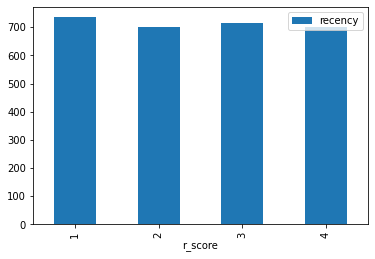

In [45]:
addr_demo_txns.groupby('r_score').agg('recency').count().to_frame().plot(kind='bar')

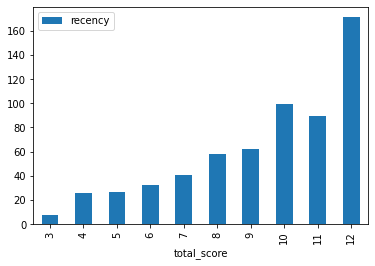

In [47]:
addr_demo_txns.groupby('total_score').agg('recency').mean().to_frame().plot(kind='bar')
plt.show()

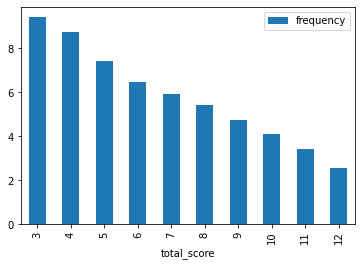

In [48]:
addr_demo_txns.groupby('total_score').agg('frequency').mean().to_frame().plot(kind='bar')
plt.show()

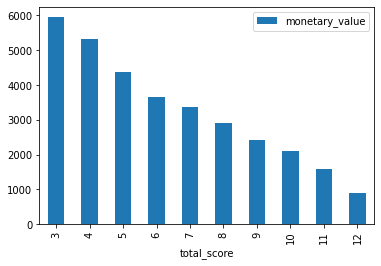

In [49]:
addr_demo_txns.groupby('total_score').agg('monetary_value').mean().to_frame().plot(kind='bar')
plt.show()

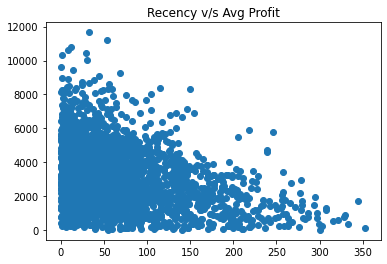

In [50]:
plt.scatter(addr_demo_txns['recency'], addr_demo_txns['monetary_value'])
plt.title('Recency v/s Avg Profit')
plt.show()

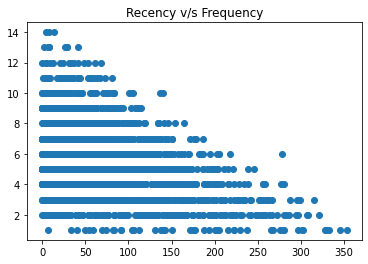

In [51]:
plt.scatter(addr_demo_txns['recency'], addr_demo_txns['frequency'])
plt.title('Recency v/s Frequency')
plt.show()

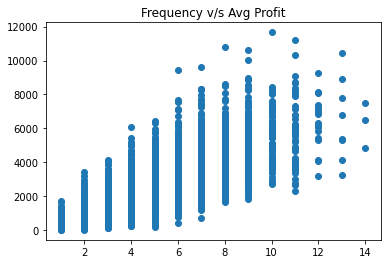

In [52]:
plt.scatter(addr_demo_txns['frequency'], addr_demo_txns['monetary_value'])
plt.title('Frequency v/s Avg Profit')
plt.show()

# Output

## Old Customer

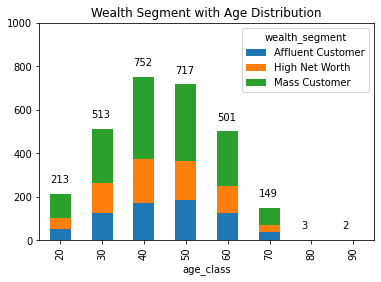

In [53]:
addr_demo_txns.groupby('age_class')['wealth_segment'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class') \
                      .agg({'wealth_segment': lambda x: len(x)})['wealth_segment']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Wealth Segment with Age Distribution')
plt.show()

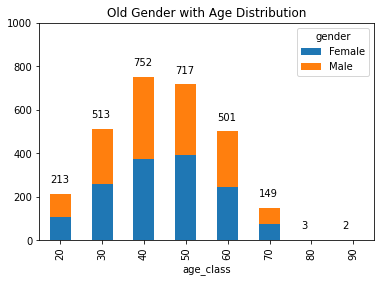

In [54]:
addr_demo_txns.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Old Gender with Age Distribution')
plt.show()

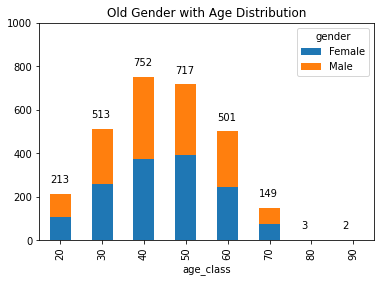

In [55]:
addr_demo_txns.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Old Gender with Age Distribution')
plt.show()

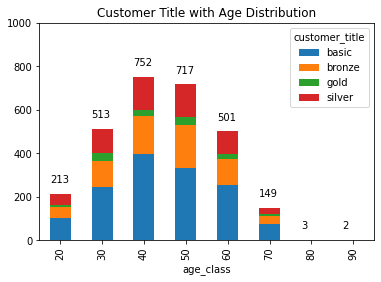

In [56]:
addr_demo_txns.groupby('age_class')['customer_title'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class') \
                      .agg({'customer_title': lambda x: len(x)})['customer_title']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Customer Title with Age Distribution')
plt.show()

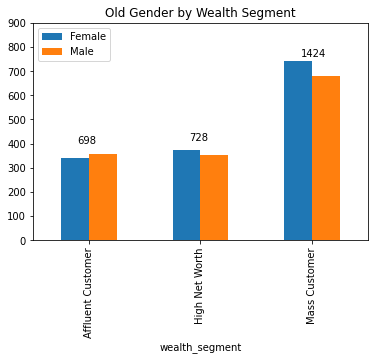

In [57]:
addr_demo_txns.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(addr_demo_txns.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Old Gender by Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

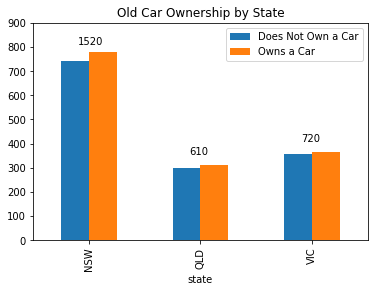

In [58]:
addr_demo_txns.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(addr_demo_txns.groupby('state') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Old Car Ownership by State')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

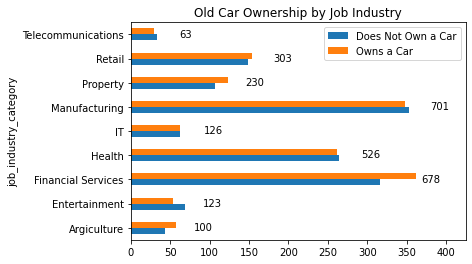

In [59]:
addr_demo_txns.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(addr_demo_txns.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 30, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,425])
plt.title('Old Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

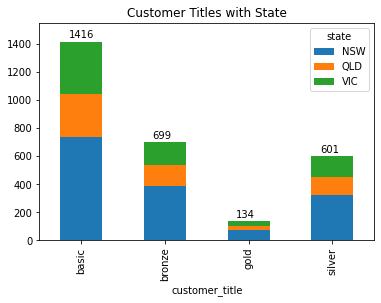

In [60]:
addr_demo_txns.groupby('customer_title')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('customer_title') \
                      .agg({'state': lambda x: len(x)})['state']):
    plt.text(i - .15, v + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1550])
plt.title('Customer Titles with State')
plt.show()

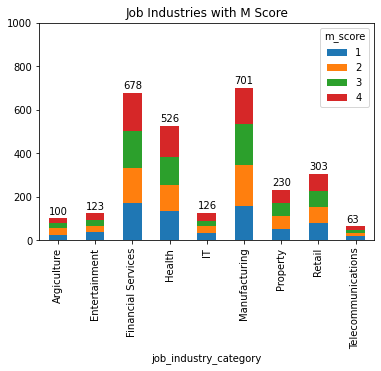

In [61]:
addr_demo_txns.groupby('job_industry_category')['m_score'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('job_industry_category') \
                      .agg({'m_score': lambda x: len(x)})['m_score']):
    plt.text(i - .25, v + 20, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Job Industries with M Score')
plt.show()

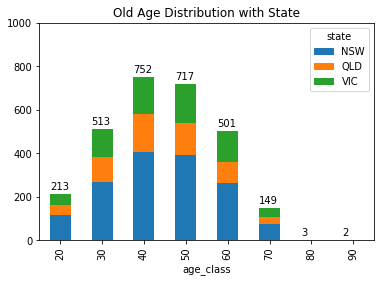

In [62]:
addr_demo_txns.groupby('age_class')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class').agg({'age': lambda x: len(x)})['age']):
    plt.text(i - .25, v + 20, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Old Age Distribution with State')
plt.show()

In [63]:
c = addr_demo_txns.groupby(['gender'])['past_3_years_bike_related_purchases'].sum().rename('count').to_frame()
c

,count
gender,
Female,69844.0
Male,69516.0


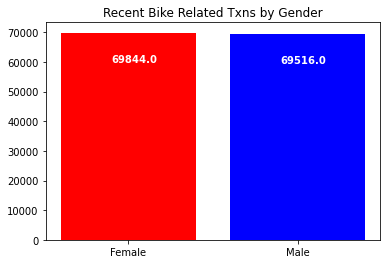

In [64]:
labels = ['Female', 'Male']
plt.bar(labels, c['count'], color=['red','blue'])
for i, v in enumerate(c['count']):
    plt.text(i - .1, v - 10e3, v, color='white', fontweight='bold')
plt.title('Recent Bike Related Txns by Gender')
plt.show()

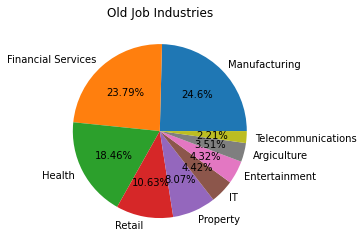

In [65]:
addr_demo_txns.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('Old Job Industries')
plt.ylabel('')
plt.show()

In [66]:
c = addr_demo_txns.groupby('customer_title').agg({'age': lambda x: len(x)})
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

,count
customer_title,
basic,1416
bronze,699
gold,134
silver,601


In [67]:
c = addr_demo_txns.groupby(['state','customer_title']).agg({'age': lambda x: len(x)})
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

count
state customer_title       
NSW   basic             738
      bronze            389
      gold               70
      silver            323
QLD   basic             305
      bronze            146
      gold               33
      silver            126
VIC   basic             373
      bronze            164
      gold               31
      silver            152

In [68]:
c = addr_demo_txns.groupby(['total_score']).agg({'age': lambda x: x.count()}).cumsum()
c.rename(columns={'age':'count'},inplace=True)
c['count'] = c['count'].astype(int)
c

,count
total_score,
3,134
4,296
5,558
6,891
7,1300
8,1712
9,2110
10,2417
11,2595


## New Customer

In [70]:
new_customer_list.head()

,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
first_name,,,,,,,,,,,,,,,,,,,,,
Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14.0,...,QLD,Australia,6.0,0.81,1.0125,1.265625,1.075781,1,1.0,1.718750
Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16.0,...,NSW,Australia,11.0,1.06,1.0600,1.325000,1.126250,1,1.0,1.718750
Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10.0,...,VIC,Australia,5.0,0.44,0.4400,0.440000,0.440000,1,1.0,1.718750
Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5.0,...,QLD,Australia,1.0,1.02,1.2750,1.275000,1.275000,4,4.0,1.703125
Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19.0,...,NSW,Australia,9.0,0.79,0.7900,0.987500,0.987500,4,4.0,1.703125


In [71]:
new_customer_list.isna().sum()

last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int64

In [72]:
print(new_customer_list.duplicated().sum())
print(new_customer_list.shape)

0
(1000, 22)


In [73]:
new_customer_list_clean = new_customer_list.dropna()
new_customer_list_clean

,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
first_name,,,,,,,,,,,,,,,,,,,,,
Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14.0,...,QLD,Australia,6.0,0.81,1.0125,1.265625,1.075781,1,1.0,1.718750
Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16.0,...,NSW,Australia,11.0,1.06,1.0600,1.325000,1.126250,1,1.0,1.718750
Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10.0,...,VIC,Australia,5.0,0.44,0.4400,0.440000,0.440000,1,1.0,1.718750
Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5.0,...,QLD,Australia,1.0,1.02,1.2750,1.275000,1.275000,4,4.0,1.703125
Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19.0,...,NSW,Australia,9.0,0.79,0.7900,0.987500,0.987500,4,4.0,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9.0,...,NSW,Australia,7.0,1.06,1.0600,1.060000,1.060000,996,996.0,0.374000
Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6.0,...,NSW,Australia,10.0,0.63,0.6300,0.787500,0.669375,997,997.0,0.357000
Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15.0,...,QLD,Australia,2.0,0.64,0.8000,0.800000,0.800000,997,997.0,0.357000


In [75]:
new_customer_list_clean['age'] = (dt.datetime.now() - new_customer_list_clean['DOB']) / np.timedelta64(1, 'Y')
new_customer_list_clean['age_class'] = ((round(new_customer_list_clean['age'] / 10)) * 10).astype(int)
new_customer_list_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,age,age_class
first_name,,,,,,,,,,,,,,,,,,,,,
Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14.0,...,6.0,0.81,1.0125,1.265625,1.075781,1,1.0,1.718750,64.697703,60
Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16.0,...,11.0,1.06,1.0600,1.325000,1.126250,1,1.0,1.718750,52.004766,50
Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10.0,...,5.0,0.44,0.4400,0.440000,0.440000,1,1.0,1.718750,47.569356,50
Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5.0,...,1.0,1.02,1.2750,1.275000,1.275000,4,4.0,1.703125,43.150374,40
Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19.0,...,9.0,0.79,0.7900,0.987500,0.987500,4,4.0,1.703125,56.503147,60


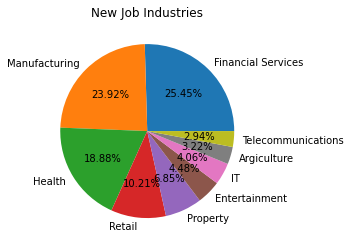

In [77]:
new_customer_list_clean.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('New Job Industries')
plt.ylabel('')
plt.show()

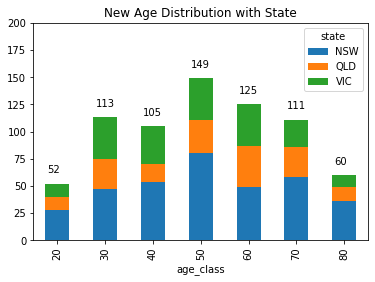

In [78]:
new_customer_list_clean.groupby('age_class')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(new_customer_list_clean.groupby('age_class').agg({'age': lambda x: len(x)})['age']):
    plt.text(i - .2, v + 10, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 200])
plt.title('New Age Distribution with State')
plt.show()

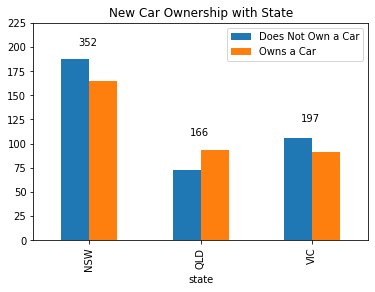

In [79]:
new_customer_list_clean.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(new_customer_list_clean.groupby('state').agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New Car Ownership with State')
plt.legend(['Does Not Own a Car', 'Owns a Car'])
plt.show()


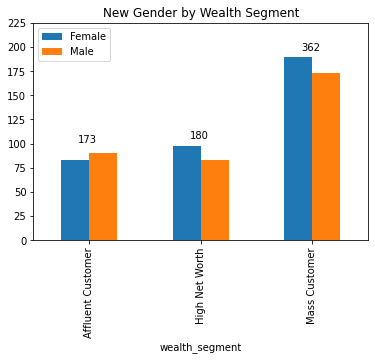

In [82]:
new_customer_list_clean.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(new_customer_list_clean.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 15, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 225])
plt.title('New Gender by Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()

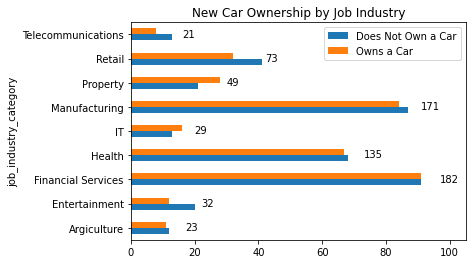

In [81]:
new_customer_list_clean.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(new_customer_list_clean.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 6, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,105])
plt.title('New Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

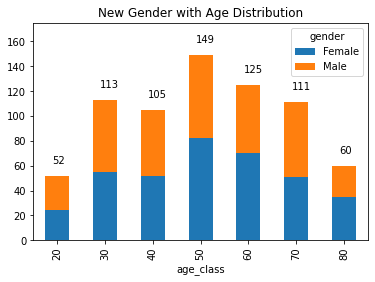

In [99]:
new_customer_list_clean.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(new_customer_list_clean.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v + 10, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 175])
plt.title('New Gender with Age Distribution')
plt.show()

In [84]:
addr_demo_txns['customer_segment'] = addr_demo_txns['total_score'].map({
    3: 'Platinum',
    4: 'Very Loyal',
    5: 'Becoming Loyal',
    6: 'Recent',
    7: 'Average',
    8: 'High Risk',
    9: 'Evasive',
    10: 'Losing',
    11: 'Inactive',
    12: 'Lost'
})
addr_demo_txns

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,gender,...,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation,customer_segment
customer_id,,,,,,,,,,,,,,,,,,,,,
1.0,7.0,11,3018.09,1,1,3,113,5,silver,Female,...,1,11.0,68.445704,70,060 Morning Avenue,2016.0,NSW,Australia,10.0,Becoming Loyal
2.0,128.0,3,2226.26,4,4,2,442,10,basic,Male,...,1,16.0,41.266501,40,6 Meadow Vale Court,2153.0,NSW,Australia,10.0,Losing
4.0,195.0,2,220.57,4,4,4,444,12,basic,Male,...,0,7.0,60.470181,60,0 Holy Cross Court,4211.0,QLD,Australia,9.0,Lost
6.0,64.0,5,3946.55,3,2,3,323,8,basic,Male,...,1,13.0,55.517307,60,9 Oakridge Court,3216.0,VIC,Australia,9.0,High Risk
7.0,253.0,3,220.11,4,4,4,444,12,basic,Female,...,1,11.0,46.079741,50,4 Delaware Trail,2210.0,NSW,Australia,9.0,Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496.0,256.0,4,2045.84,4,4,2,442,10,basic,Male,...,1,19.0,35.911155,40,2565 Caliangt Point,2171.0,NSW,Australia,9.0,Losing
3497.0,52.0,3,1648.32,3,4,4,344,11,basic,Female,...,1,18.0,35.889252,40,96 Delladonna Trail,3976.0,VIC,Australia,5.0,Inactive
3498.0,127.0,6,3147.33,4,3,3,433,10,basic,Female,...,0,5.0,26.388714,30,3 Nova Point,3012.0,VIC,Australia,4.0,Losing


In [85]:
top_1000 = addr_demo_txns.sort_values('rfm_class').head(1000)
top_1000

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_title,gender,...,owns_car,tenure,age,age_class,address,postcode,state,country,property_valuation,customer_segment
customer_id,,,,,,,,,,,,,,,,,,,,,
973.0,8.0,8,6639.85,1,1,1,111,3,gold,Female,...,0,15.0,42.640930,40,42 Dahle Parkway,3806.0,VIC,Australia,7.0,Platinum
2391.0,12.0,10,5862.45,1,1,1,111,3,gold,Female,...,0,14.0,60.919197,60,9501 Melby Avenue,4178.0,QLD,Australia,7.0,Platinum
1000.0,0.0,9,5383.48,1,1,1,111,3,gold,Female,...,0,11.0,43.626577,40,4757 Texas Trail,3136.0,VIC,Australia,9.0,Platinum
2464.0,2.0,13,7817.10,1,1,1,111,3,gold,Male,...,0,6.0,38.963921,40,3126 Butterfield Pass,2573.0,NSW,Australia,8.0,Platinum
2476.0,14.0,14,7493.23,1,1,1,111,3,gold,Male,...,0,17.0,65.491502,70,567 Scott Park,4118.0,QLD,Australia,5.0,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047.0,34.0,5,3909.14,2,2,3,223,7,bronze,Male,...,1,19.0,60.188176,60,85 Northland Circle,2077.0,NSW,Australia,10.0,Average
208.0,27.0,5,3342.02,2,2,3,223,7,bronze,Male,...,0,5.0,27.393526,30,056 Stone Corner Alley,4078.0,QLD,Australia,7.0,Average
1697.0,24.0,5,3042.48,2,2,3,223,7,bronze,Female,...,1,12.0,52.984743,50,9037 Norway Maple Junction,2087.0,NSW,Australia,11.0,Average


In [97]:
addr_demo_txns.to_excel('Top 100.xlsx')